# FUNGI

In [29]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### ALPHA & BETA DIVERSITY
1. make a MAFFT tree
2. alpha rarefaction
3. alpha diversity
4. beta diversity

In [30]:
#import packages
import os
import dokdo
import qiime2 as q2
import pandas as pd
import seaborn as sns
import plotnine as p9
import matplotlib.pyplot as plt
from qiime2.plugins import phylogeny
from qiime2.plugins import diversity
from skbio import DistanceMatrix
import qiime2.plugins.phylogeny.actions as phylogeny_actions

In [31]:
# define workdir
%env WORKDIR /home/nezapa/qiime-thesis
WORKDIR = os.environ.get("WORKDIR")

env: WORKDIR=/home/nezapa/qiime-thesis


In [32]:
# import data
denoisetable_fun = q2.Artifact.load('./results/denoisetable_fun.qza')
rep_seqs_fun = q2.Artifact.load('./results/rep_seqs_fun.qza')
denoising_stats = q2.Artifact.load('./results/denoising_stats.qza')
sample_metadata = q2.Metadata.load('../00.sample-metadata.tsv')

In [33]:
from qiime2.plugins import feature_table

# summarise and visualise
feature_table.visualizers.summarize(
    table = denoisetable_fun,
    sample_metadata = sample_metadata
).visualization

<visualization: Visualization uuid: b57cdbda-6428-4607-9b61-8058c1127551>

### TREE

In [34]:
action_results = phylogeny_actions.align_to_tree_mafft_fasttree(
    sequences=rep_seqs_fun,
)
aligned_rep_seqs = action_results.alignment
masked_aligned_rep_seqs = action_results.masked_alignment
unrooted_tree = action_results.tree
rooted_tree = action_results.rooted_tree

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 1 /tmp/qiime2-archive-mti1b5ca/47929d78-65f2-42ac-ac64-a70bc709d063/data/dna-sequences.fasta



inputfile = orig
118 x 260 - 260 d
nthread = 1
nthreadpair = 1
nthreadtb = 1
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  101 / 118 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 
  110 / 118
done.

Progressive alignment 1/2... 
STEP    12 / 117 (thread    0)
Reallocating..done. *alloclen = 1521
STEP   117 / 117 (thread    0)
done.

Making a distance matrix from msa.. 
  100 / 118 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
  110 / 118
done.

Progressive alignment 2/2... 
STEP    22 / 117 (thread    0)
Reallocating..done. *alloclen = 1521
STEP   117 / 117 (thread    0)
done.

disttbfast (nuc) Version 7.505
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto inpu

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTree -quote -nt /tmp/qiime2-archive-gug5srab/57bbd1fe-679d-409d-a873-e774bd561516/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: /tmp/qiime2-archive-gug5srab/57bbd1fe-679d-409d-a873-e774bd561516/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
Initial topology in 0.04 seconds
Refining topology: 27 rounds ME-NNIs, 2 rounds ME-SPRs, 14 rounds ML-NNIs
      0.11 seconds: SPR round   1 of   2, 101 of 232 nodes
      0.23 seconds: ME NNI round 10 of 27, 1 of 115 splits
      0.40 seconds: SPR round   2 of   2, 201 of 232 nodes
Total branch-length 8.254 after 0.45 sec
      0.67 seconds: ML NNI round 1 of 14, 101 of 115 splits, 23 changes (max delta 8.570)
ML-NNI round 1: LogLk = -11498.496 NNIs 28 max delta 8.57 Time 0.70
Switched to using 20 rate categories (CAT approximation)
Rate categories were divided by 1.027 so that ave

### ALPHA AND BETA DIVERSITY

In [35]:
# # choose a round number in the 3rd quartile frequency per sample from the feature table visual summary
# # this step can take some time
# alpha_rarefaction_all = diversity.actions.alpha_rarefaction(
#     table = denoisetable_fun,
#     max_depth = 35000,
#     phylogeny = rooted_tree,
#     metrics = {'observed_features'},
#     metadata = sample_metadata,
#     steps = 1000
# )

In [36]:
# save alpha_rarefacion
# alpha_rarefaction_all.visualization.save('./results/alpha_rarefaction_35000.qzv')
qzv_file_alpha = q2.Visualization.load('./results/alpha_rarefaction_35000.qzv')

In [37]:
q2.Visualization.load('./results/alpha_rarefaction_35000.qzv')

<visualization: Visualization uuid: f6996cdb-98a1-4682-9686-f074ac0ddacd>

In [38]:
# #this step can take some time
# sns.set()
# ax = dokdo.alpha_rarefaction_plot(qzv_file_alpha,
#                                   figsize=(9, 6),
#                                   metric='observed_features')
# ax.legend(ncol=5)
# plt.tight_layout()
# plt.savefig('./results/fun_alpha_rarefaction_plot_35k.png')

### ALPHA DIVERSITY

In [39]:
from qiime2.plugins import feature_table

# summarise and visualise
feature_table.visualizers.summarize(
    table = denoisetable_fun,
    sample_metadata = sample_metadata
).visualization

<visualization: Visualization uuid: ac4bf820-3fab-44b6-8c10-816230e64ad2>

In [40]:
# set sampling_depth based on alpha rarefacation curve
depth = 8341
action_results = diversity.actions.core_metrics_phylogenetic(
    table = denoisetable_fun,
    phylogeny = rooted_tree,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-gga8_4xe/b85d779f-6a85-4cd3-85fb-43f05691be1f/data/feature-table.biom -t /tmp/qiime2-archive-yhd88a94/53029d74-2e5b-49fc-b4be-07e94e088ee0/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-bz57jj3i

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-gga8_4xe/b85d779f-6a85-4cd3-85fb-43f05691be1f/data/feature-table.biom -t /tmp/qiime2-archive-yhd88a94/53029d74-2e5b-49fc-b4be-07e94e088ee0/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-zucpvgpa

Running external command line application. This may print messages to stdout and/

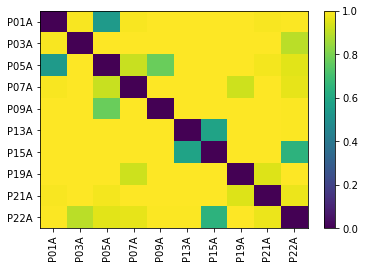

In [41]:
action_results.bray_curtis_distance_matrix.view(view_type=DistanceMatrix)

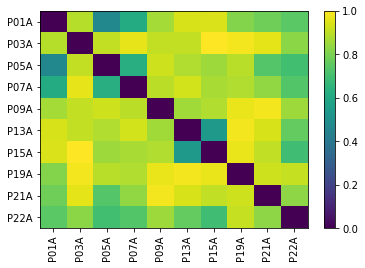

In [42]:
action_results.jaccard_distance_matrix.view(view_type=DistanceMatrix)

In [43]:
action_results.jaccard_emperor

<visualization: Visualization uuid: 031dcead-79e5-475e-9535-c28f36ecfffb>

In [44]:
# alpha_rarefaction = diversity.visualizers.alpha_rarefaction(
#    table = denoisetable_fun,
#    phylogeny = rooted_tree,
#    max_depth = depth,
#    metadata = sample_metadata,
#    metrics = {'chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance'},
#    steps =  100
# )
# alpha_rarefaction.visualization.save('./results/alpha_diversity_new.qzv')

In [45]:
#alpha_rarefaction.visualization.save('./results/alpha_diversity.qzv')
alpha_rarefaction = q2.Visualization.load('./results/alpha_diversity_new.qzv')

In [46]:
alpha_rarefaction

<visualization: Visualization uuid: 74caa355-924d-458a-95c8-df801721c727>

In [47]:
metrics = ['chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance']

# alpha diversity metrics and significance

# init empty list
df_list = []
artifacts = {}

# loop over metrics
for metric in metrics:
    result = diversity.actions.alpha(
        table = action_results.rarefied_table,
        metric = metric
    )  # save to result
    artifact = result.alpha_diversity  # extract artifact
    artifacts[metric] = artifact
    df_list.append(artifact.view(view_type=q2.Metadata).to_dataframe())  # convert to DF and add to list
    
df = pd.concat(df_list, axis=1)  # merge list of dataframes, add each DF as new column (instead of new row (default))
df

,chao1,simpson,simpson_e,observed_features,dominance
Sample ID,,,,,
P01A,26.6,0.284038,0.053720,26.0,0.715962
P03A,4.0,0.104135,0.279060,4.0,0.895865
P05A,20.0,0.727906,0.183760,20.0,0.272094
P07A,25.0,0.693179,0.135801,24.0,0.306821
P09A,8.0,0.081992,0.136164,8.0,0.918008
P13A,14.0,0.102710,0.139308,8.0,0.897290
P15A,11.0,0.533658,0.194941,11.0,0.466342
P19A,53.0,0.943339,0.346052,51.0,0.056661
P21A,48.0,0.953437,0.466877,46.0,0.046563


<AxesSubplot:xlabel='index', ylabel='observed_features'>

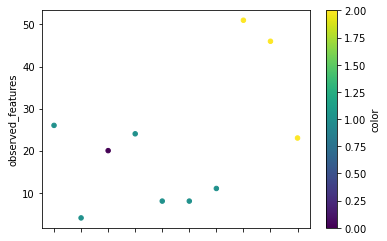

In [48]:
ndf = df.merge(sample_metadata.to_dataframe(), left_index=True, right_index=True)
ndf["color"] = ndf.groupby("population").ngroup()
ndf.reset_index().plot.scatter("index", "observed_features", c="color", cmap=plt.cm.viridis)

In [49]:
col = 'observed_features'
meta_cols = ['year', 'population']
df1 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type=@col')

col = 'chao1'
df2 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type=@col')

df = pd.concat([df1, df2])
df

,year,population,value,type
P01A,2015,Linija reke Ljubljanice,26.0,observed_features
P03A,2015,Linija reke Ljubljanice,4.0,observed_features
P05A,2016,Dolenjska linija,20.0,observed_features
P07A,2017,Linija reke Ljubljanice,24.0,observed_features
P09A,2019,Linija reke Ljubljanice,8.0,observed_features
P13A,2019,Linija reke Ljubljanice,8.0,observed_features
P15A,2019,Linija reke Ljubljanice,11.0,observed_features
P19A,2016,Črna podvrsta,51.0,observed_features
P21A,2015,Črna podvrsta,46.0,observed_features
P22A,2020,Črna podvrsta,23.0,observed_features


/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/fungi_obs-feat_chao1.png


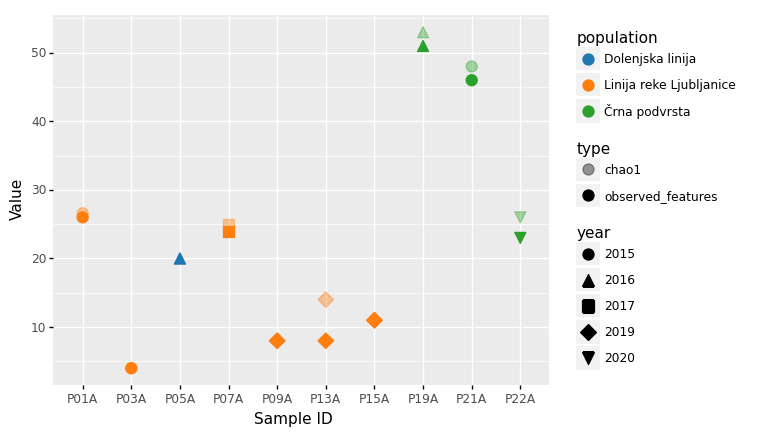

<ggplot: (8792856113116)>

In [50]:
from plotnine import *
from plotnine.data import *

p = (
    ggplot(df, aes(x=df.index, y='value', shape='year', color='population', alpha='type'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='Value')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + scale_alpha_manual([0.4, 1.0])
)

p.save('./results/fungi_obs-feat_chao1.png')

p

In [51]:
# shannon = (
#     ggplot(ndf, aes(x=ndf.index, y='shannon_entropy', shape='year', color='population'))
#     + geom_point(size=4)
#     + labs(x='Sample ID', y='shannon_entropy')
#     + scale_color_manual(['C0', 'C1', 'C2'])
# )

# shannon.save('./results/fungi_shannon.png')
# shannon

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/fungi_simpson_e.png


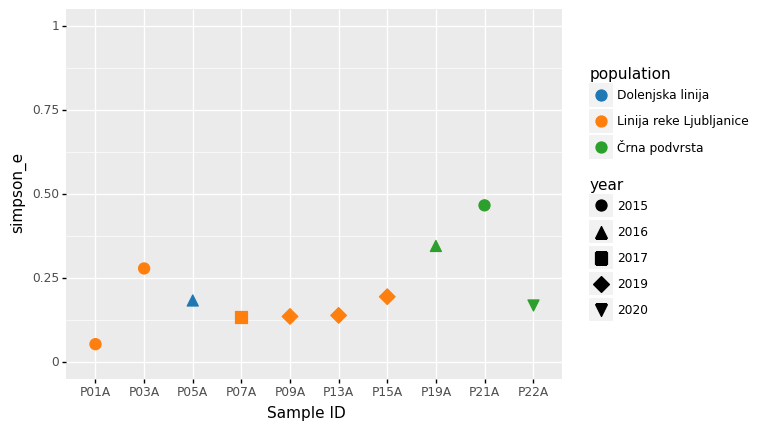

<ggplot: (8792865072866)>

In [52]:
simpson = (
    ggplot(ndf, aes(x=ndf.index, y='simpson_e', shape='year', color='population'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='simpson_e')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + ylim(0,1)
)

simpson.save('./results/fungi_simpson_e.png')
simpson 

In [53]:
# visualisations of alpha diversity metrics
visualizations = {}

for key, value in artifacts.items():
    visualizations[key] = diversity.visualizers.alpha_group_significance(
        alpha_diversity = value,
        metadata = sample_metadata
    ).visualization

In [54]:
# # simpson viz
# visualizations['simpson']

# # observed_features viz
# visualizations['observed_features']

# # fisher_alpha viz
# visualizations['fisher_alpha']

# # chao1 viz
# visualizations['chao1']

# # shannon viz
# visualizations['shannon']

# # evenness_vector viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.evenness_vector,
#     metadata = sample_metadata
# ).visualization

# # faith_pd viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.faith_pd_vector,
#     metadata = sample_metadata
# ).visualization

### BETA DIVERSITY

In [66]:
denoisetable_subset_population = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_fun,
    metadata = sample_metadata,
    where = "[population] IN ('Linija reke Ljubljanice', 'Črna podvrsta')"
)

In [67]:
# 2016 pade ven
denoisetable_subset_year = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_fun,
    metadata = sample_metadata,
    where = "[year] IN ('2015', '2019')"
)

In [68]:
# determine depth/s from alpha_rarefaction
# determine conditions from metadata column names
depth = 8367
condition = 'population'

core_metrics_results_subset_population = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_population.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-_0etec2e/e8ab107c-db24-4240-b8df-6619727aecb2/data/feature-table.biom -t /tmp/qiime2-archive-yhd88a94/53029d74-2e5b-49fc-b4be-07e94e088ee0/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-s0abljzw

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-_0etec2e/e8ab107c-db24-4240-b8df-6619727aecb2/data/feature-table.biom -t /tmp/qiime2-archive-yhd88a94/53029d74-2e5b-49fc-b4be-07e94e088ee0/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-q2rb5k4f

Running external command line application. This may print messages to stdout and/

In [69]:
depth = 8367
condition = 'year'

core_metrics_results_subset_year = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_year.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-0vtzk37o/4a1c463c-3974-4dde-a21c-76e472334725/data/feature-table.biom -t /tmp/qiime2-archive-yhd88a94/53029d74-2e5b-49fc-b4be-07e94e088ee0/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-5iam_u4_

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-0vtzk37o/4a1c463c-3974-4dde-a21c-76e472334725/data/feature-table.biom -t /tmp/qiime2-archive-yhd88a94/53029d74-2e5b-49fc-b4be-07e94e088ee0/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-vn6ymgxf

Running external command line application. This may print messages to stdout and/

#### PERMANOVA

In [70]:
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "permanova",
    pairwise = True
)
permanova_population.visualization

<visualization: Visualization uuid: 8c2b7cd3-6bd8-4b49-bfd7-4341107056ec>

<Figure size 432x288 with 0 Axes>

In [71]:
# PERMANOVA year
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "permanova",
    pairwise = True
)
permanova_year.visualization

<visualization: Visualization uuid: 1e7fad17-09c8-404a-8aef-17e4e32e7e07>

<Figure size 432x288 with 0 Axes>

#### ANOSIM

In [72]:
anosim_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "anosim",
    pairwise = True
)
anosim_population.visualization

<visualization: Visualization uuid: b9e6809a-25e0-4923-b638-c1e7b444268f>

<Figure size 432x288 with 0 Axes>

In [73]:
# anosim year

anosim_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "anosim",
    pairwise = True
)
anosim_year.visualization

<visualization: Visualization uuid: fffac70c-f14c-42cb-8e9f-d90e7ddff1ce>

<Figure size 432x288 with 0 Axes>